In [28]:
import pandas as pd
import bank_note
credit=pd.read_csv('German_Credit.csv',names=bank_note.columns)
print(credit.head(10))
print('改為網頁輸出，較方便查看內容')
credit.to_html('credit1.html')
print('了解欄位名稱，-容易有誤判風險')
print(credit.columns)
print('儲存欄位名稱')
cols=credit.columns
credit.columns=[str.replace('-','_') for str in cols]
print('修改完成')
print(credit.columns)
print('改為網頁輸出，較方便查看內容')
credit.to_html('credit2.html')
print('查找遺失值1')
print(credit.isnull().sum())#計算遺失值數量
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(credit.dtypes) #全部欄位的資料型態

   customer_id checking_account_status  loan_duration_mo credit_history  \
0      1122334                     A11                 6            A34   
1      6156361                     A12                48            A32   
2      2051359                     A14                12            A34   
3      8740590                     A11                42            A32   
4      3924540                     A11                24            A33   
5      3115687                     A14                36            A32   
6      8251714                     A14                24            A32   
7      2272783                     A12                36            A32   
8      1865292                     A14                12            A32   
9      8369450                     A12                30            A34   

  purpose  loan_amount savings_account_balance time_employed_yrs  \
0     A43         1169                     A65               A75   
1     A43         5951                

In [29]:
print('遺失值乍看之下沒有，我們再來做一個動作確認')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in credit.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',credit[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在')
  if credit[i].dtype==object:
    try:
      credit[i]=credit[i].astype('float') #轉換
      list3.append(i) #轉換成功
      print('轉換成功')      
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)

遺失值乍看之下沒有，我們再來做一個動作確認
分成數值與字串兩種欄位資料紀錄
欄位名稱: customer_id
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: checking_account_status
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: loan_duration_mo
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: credit_history
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: purpose
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: loan_amount
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: savings_account_balance
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: time_employed_yrs
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: payment_pcnt_income
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: gender_status
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: other_signators
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: time_in_

In [30]:
print('查看客戶編號有沒有重複')
print(credit.duplicated(subset='customer_id').sum())
print('有重複值再選擇保留第一個或最後一個，我們選擇保留第一個')
print('刪除之前的形狀：',credit.shape)
try:
  credit2=credit.drop_duplicates(subset='customer_id',keep='first')
except:
  print('沒有重複值')
print('刪除後的形狀：',credit2.shape)

查看客戶編號有沒有重複
12
有重複值再選擇保留第一個或最後一個，我們選擇保留第一個
刪除之前的形狀： (1012, 22)
刪除後的形狀： (1000, 22)


In [31]:
print('查看客戶編號有沒有重複')
print(credit.duplicated(subset='customer_id').sum())
try:
  credit3=credit[credit['customer_id'].duplicated()==True]
except:
  print('沒有重複值')
print(credit3)
try:
  credit4=credit[credit['customer_id'].duplicated(keep=False)==True]
except:
  print('沒有重複值')
print(credit4)
credit4.to_html('credit4.html')
print('有重複值再選擇保留第一個或最後一個，我們選擇保留第一個')
print('刪除之前的形狀：',credit.shape)
try:
  credit2=credit.drop_duplicates(subset='customer_id',keep='first')
except:
  print('沒有重複值')
print('刪除後的形狀：',credit2.shape)

查看客戶編號有沒有重複
12
     customer_id checking_account_status  loan_duration_mo credit_history  \
245      7860808                     A14                12            A32   
494      6793340                     A11                36            A32   
530      7957595                     A12                18            A32   
607      2801710                     A12                 9            A32   
757      5926774                     A14                15            A32   
764      9517102                     A13                 6            A34   
766      5969658                     A14                24            A32   
773      4776602                     A12                12            A32   
902      7464596                     A12                24            A32   
903      9907330                     A11                 6            A34   
910      7549449                     A14                24            A32   
911      6328203                     A14                15   

數值部分，以Hist顯示
['customer_id', 'loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents', 'bad_credit']


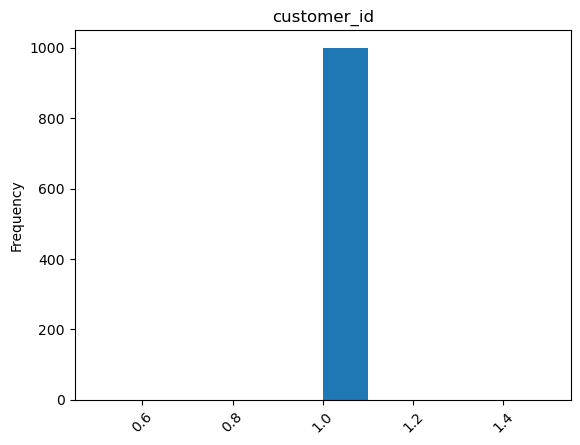

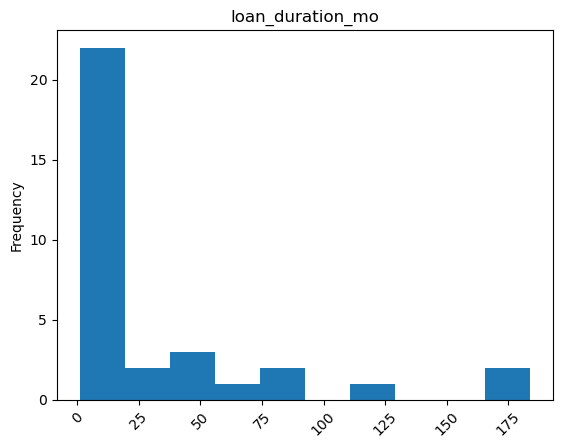

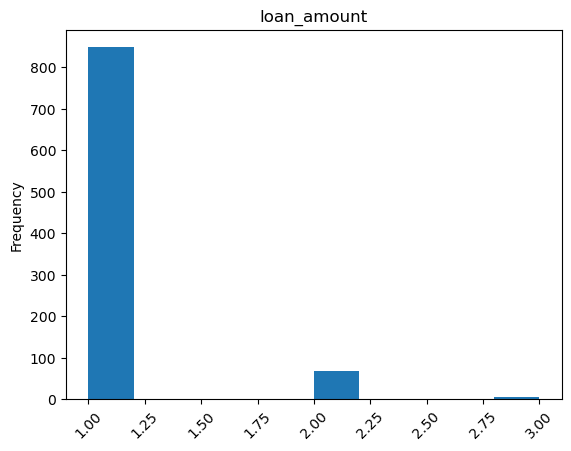

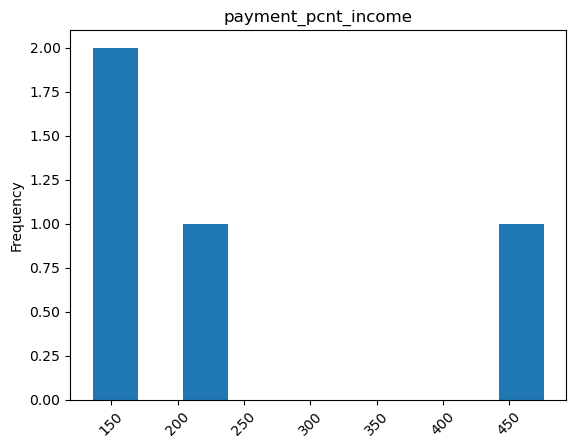

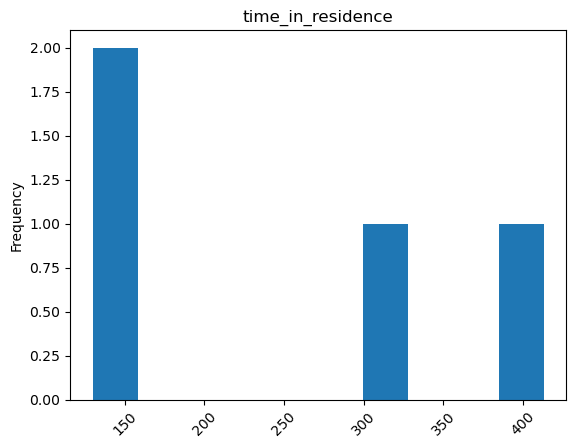

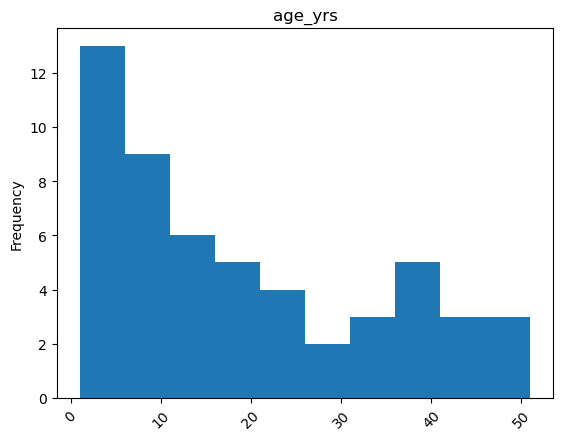

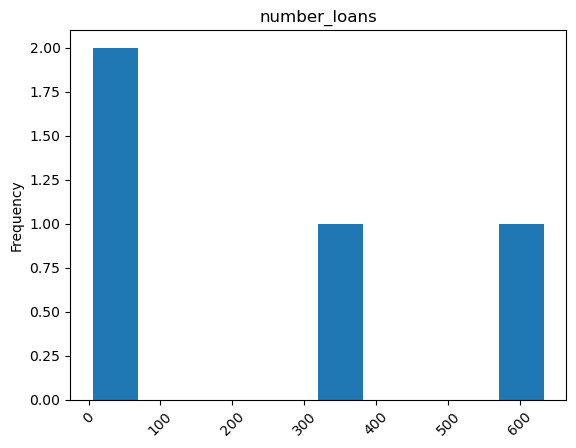

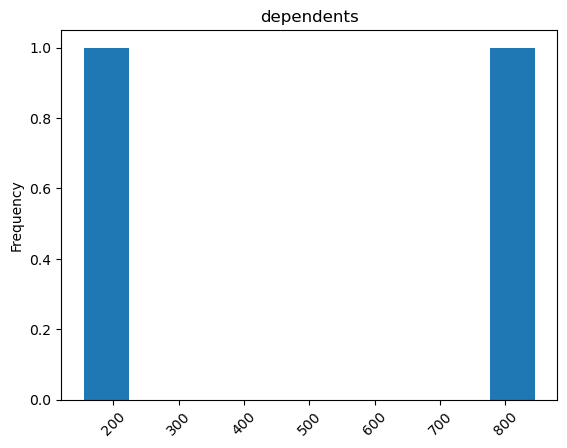

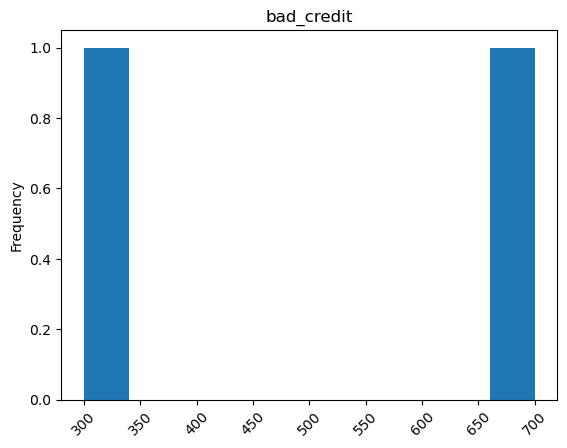

In [32]:
print('數值部分，以Hist顯示')
import matplotlib.pyplot as plt
print(list3)
for cols in list3:
  credit2[cols].value_counts().plot(
      kind='hist',
      title=cols,rot=45
  )
  plt.savefig('hist_'+cols+'.png')
  plt.show()

字串部分，以Bar顯示，分類方式操作


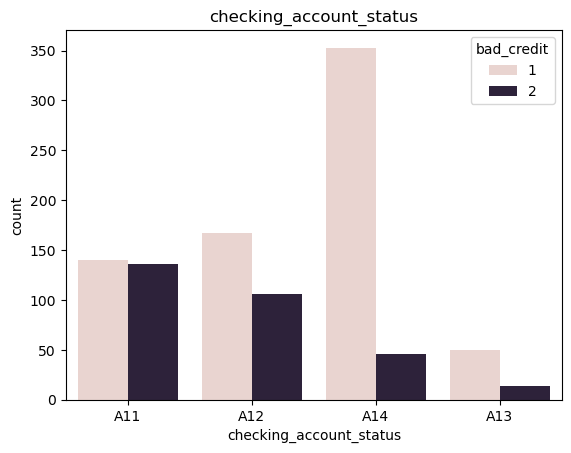

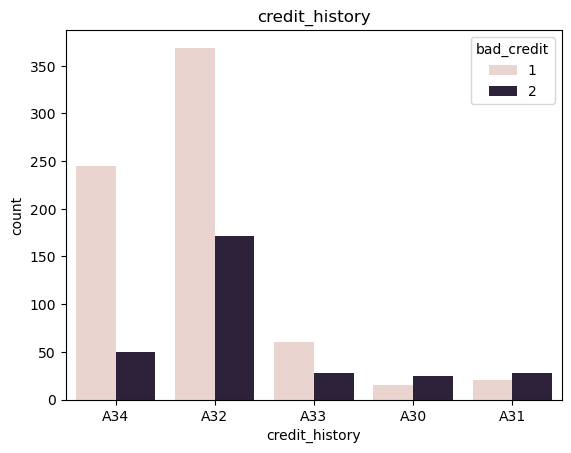

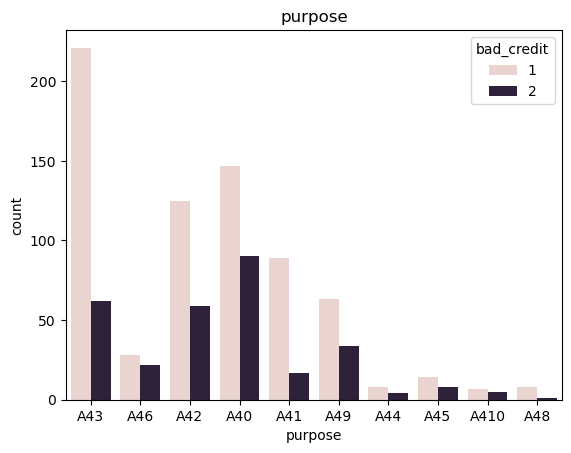

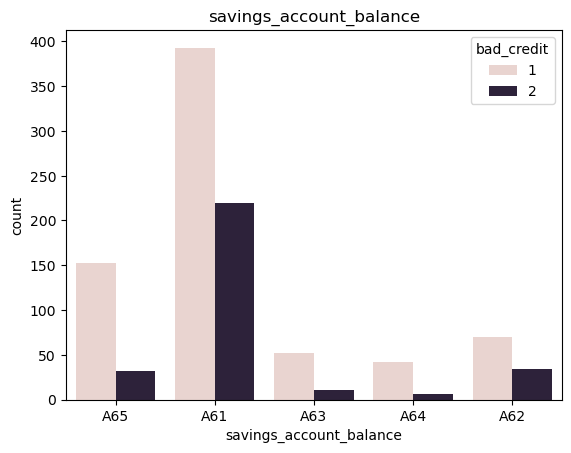

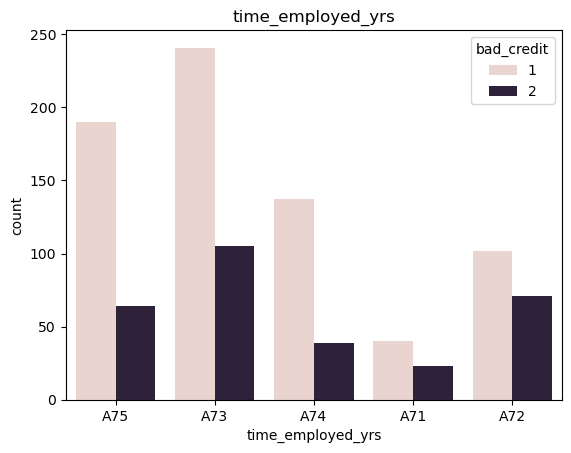

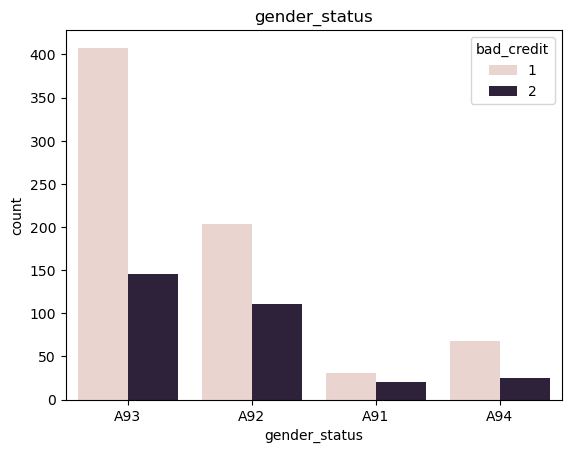

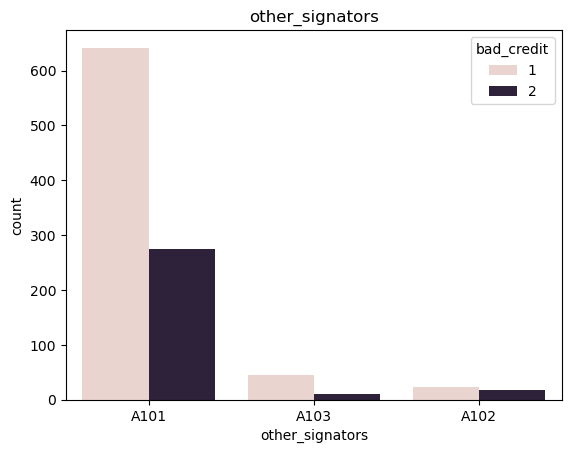

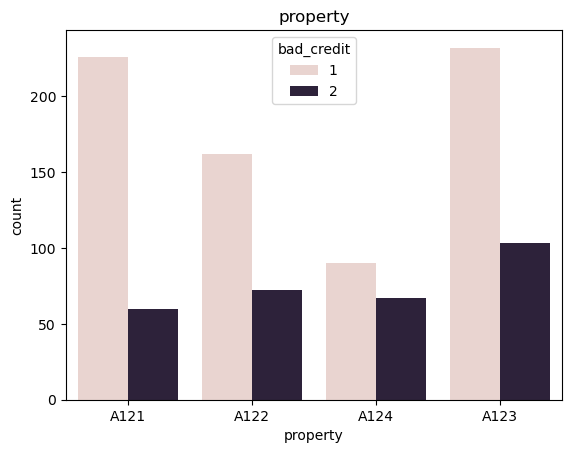

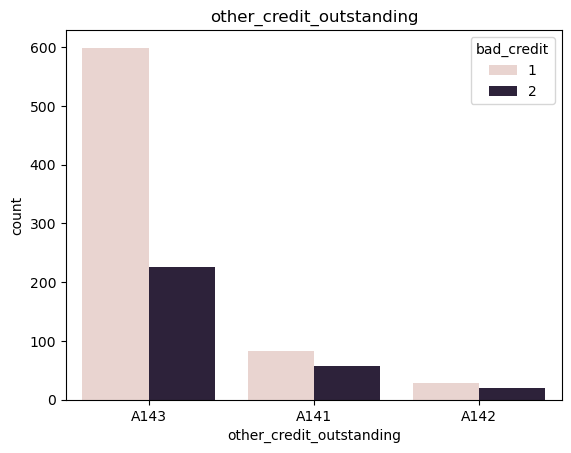

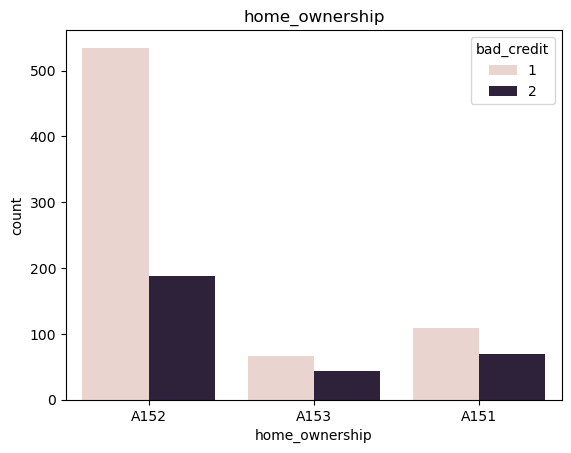

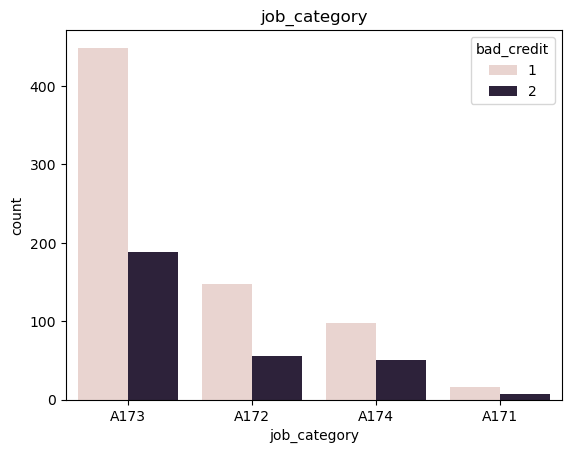

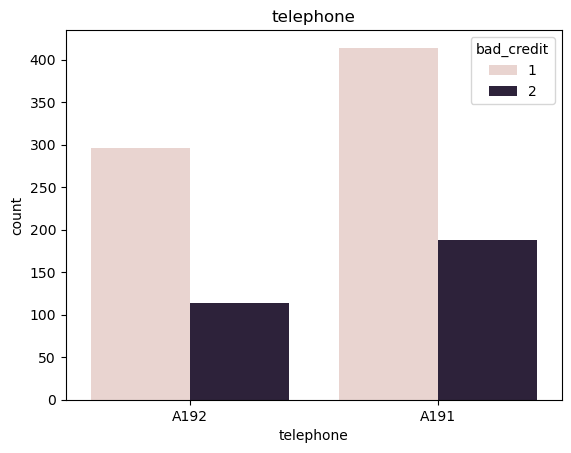

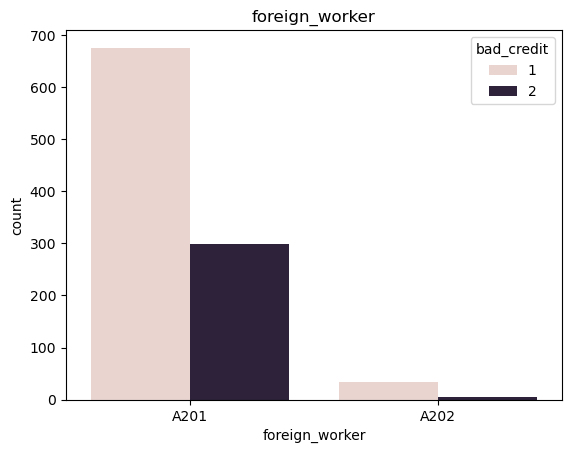

In [37]:
print('字串部分，以Bar顯示，分類方式操作')
import matplotlib.pyplot as plt
import seaborn as sns
for cols in list4:
  plt.title(cols)
  sns.countplot(x=cols,data=credit,hue='bad_credit')
  plt.savefig('bar2_'+cols+'.png')
  plt.show()

數值部分，以boxplot顯示，分類部分操作
['customer_id', 'loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents', 'bad_credit']


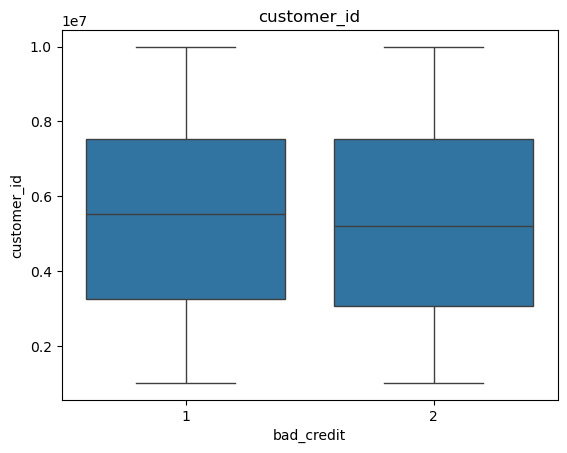

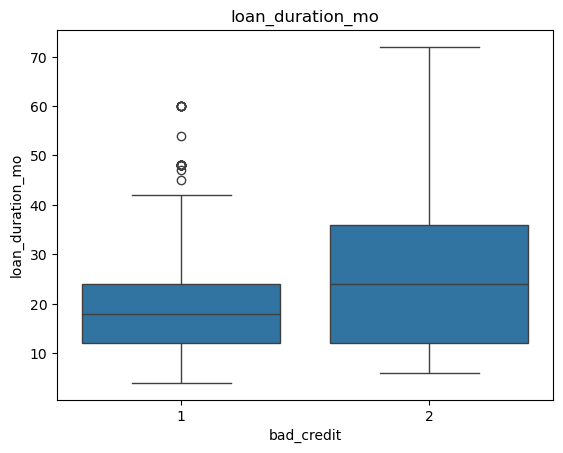

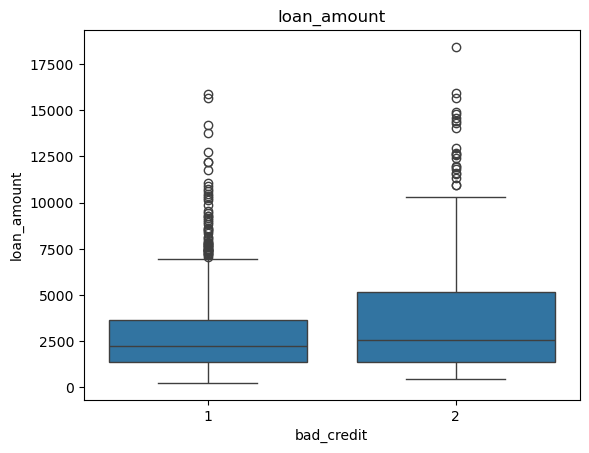

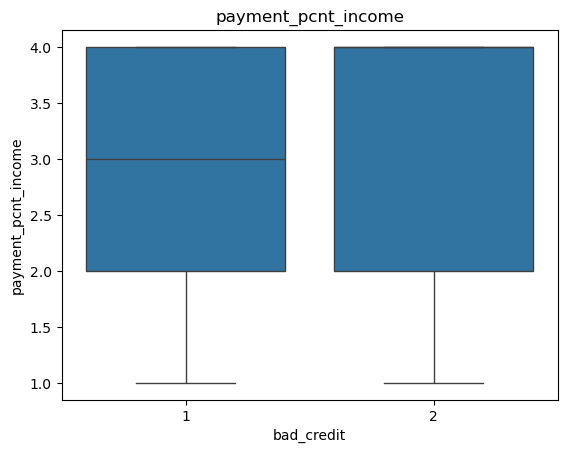

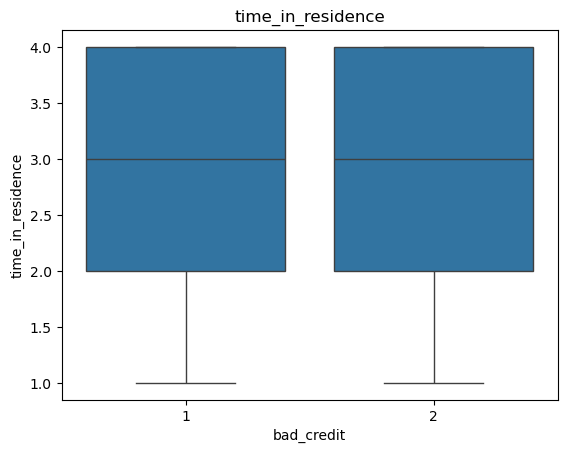

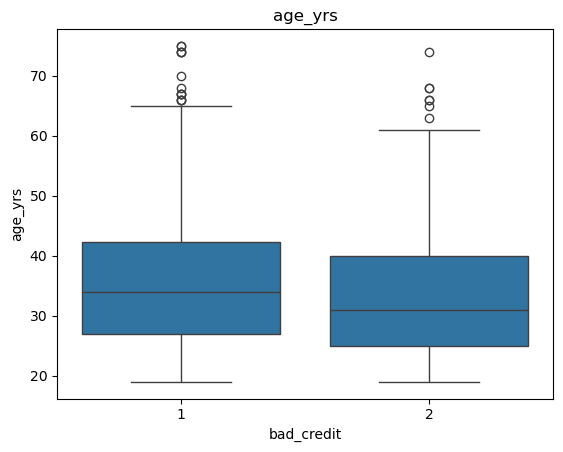

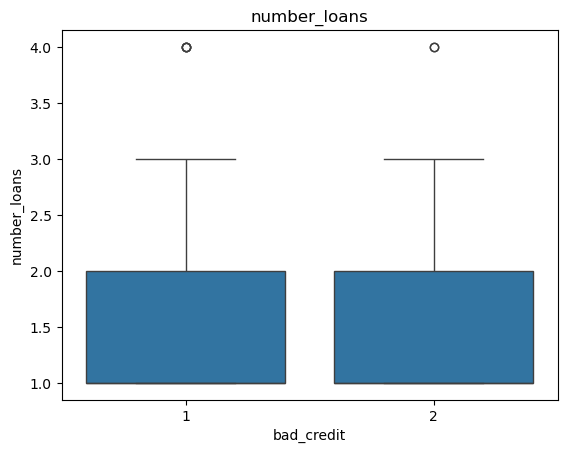

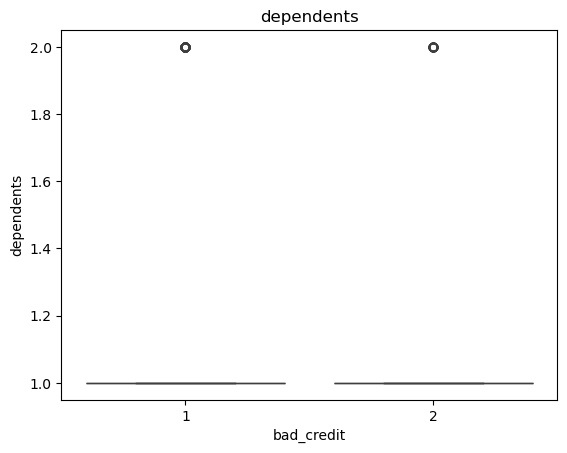

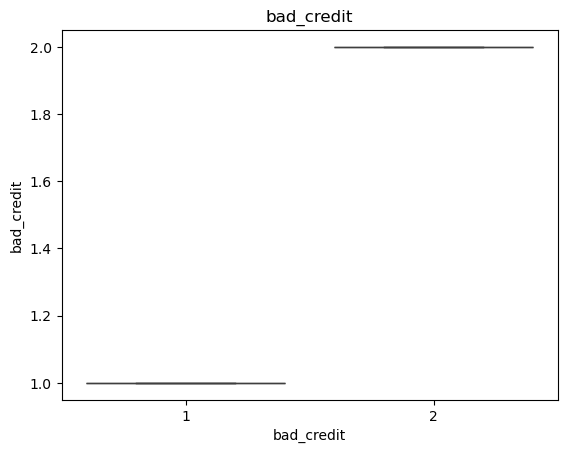

In [38]:
print('數值部分，以boxplot顯示，分類部分操作')
import matplotlib.pyplot as plt
import seaborn as sns
print(list3)
for cols in list3:
  plt.title(cols)
  sns.boxplot(x='bad_credit',y=cols,data=credit2)
  plt.savefig('box2_'+cols+'.png')
  plt.show()

數值部分，以scatter顯示，加入分類
['customer_id', 'loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents', 'bad_credit']


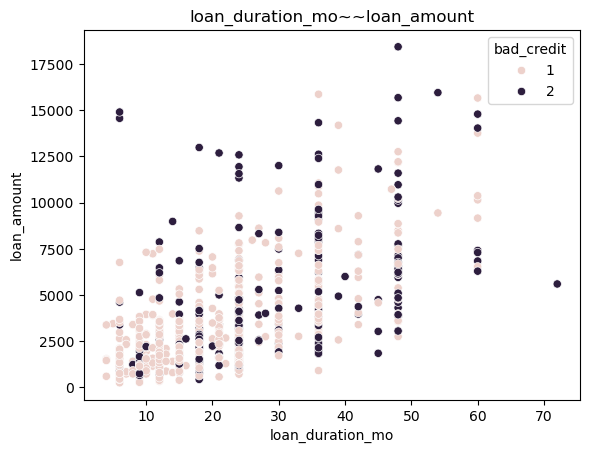

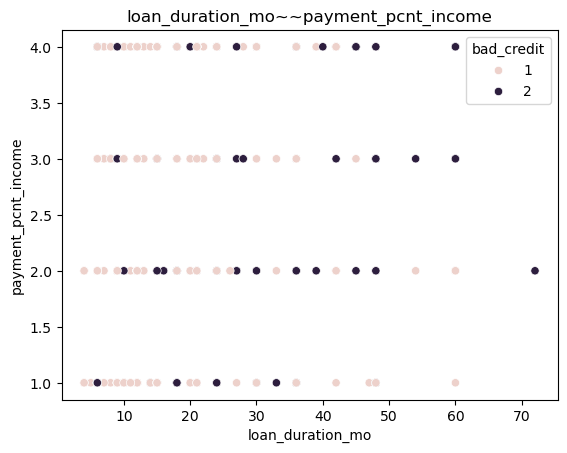

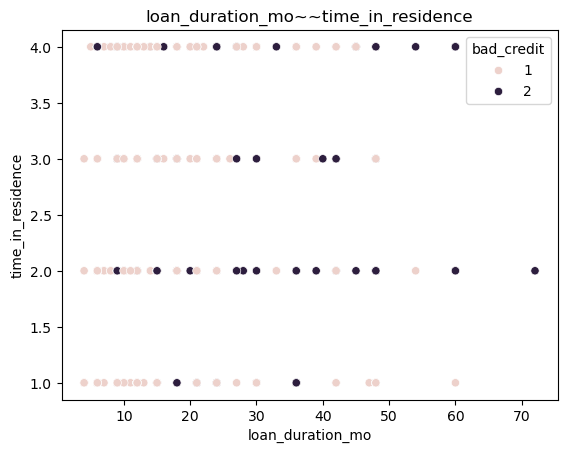

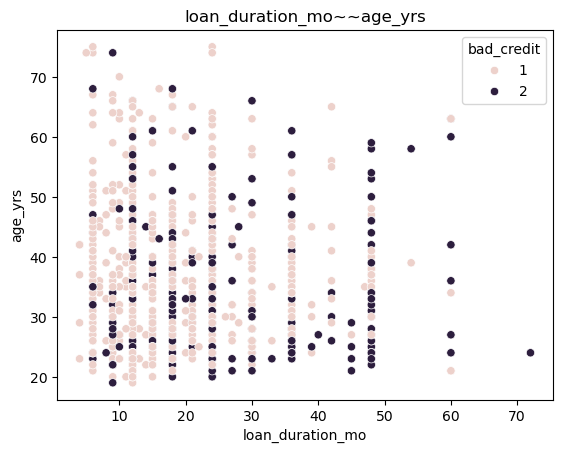

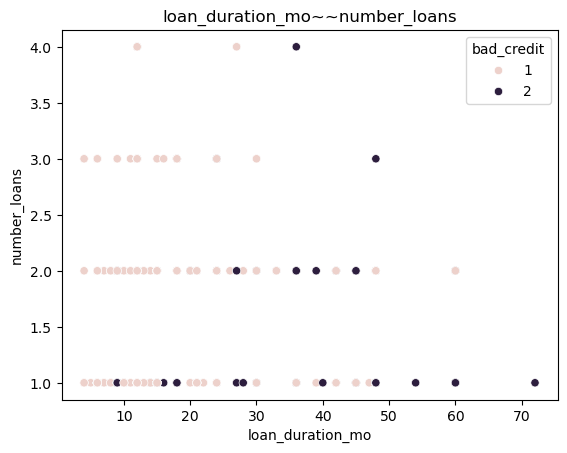

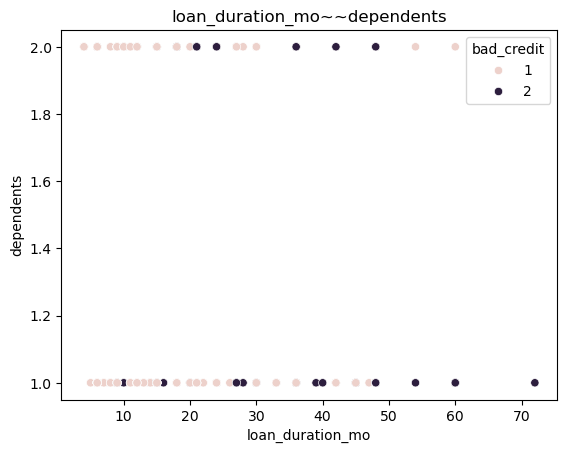

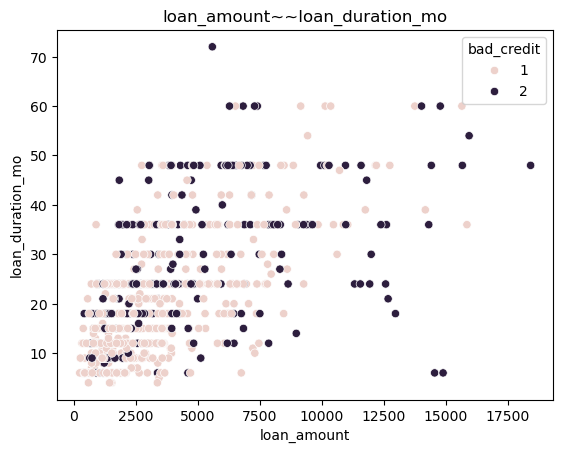

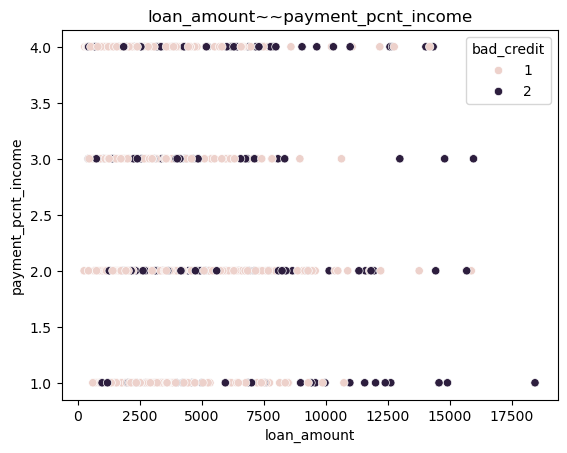

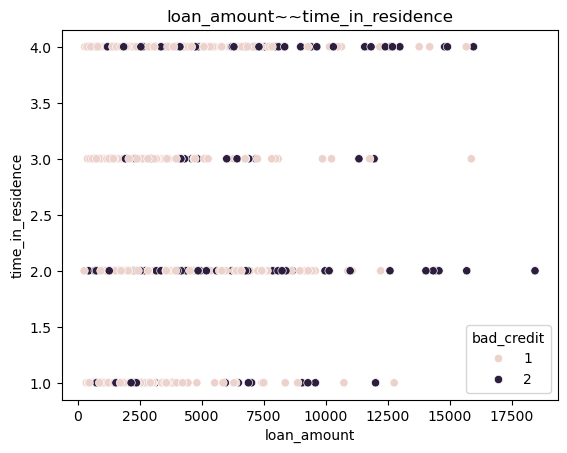

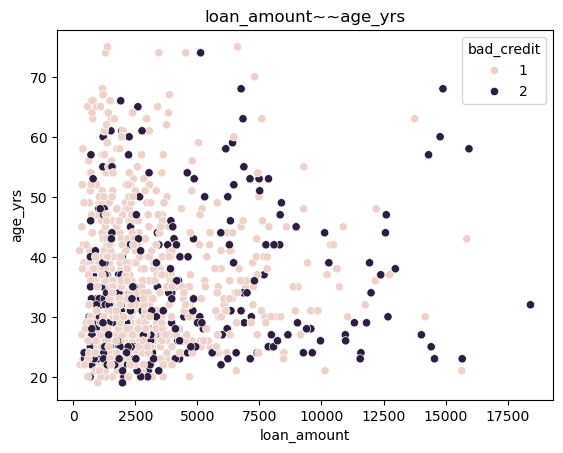

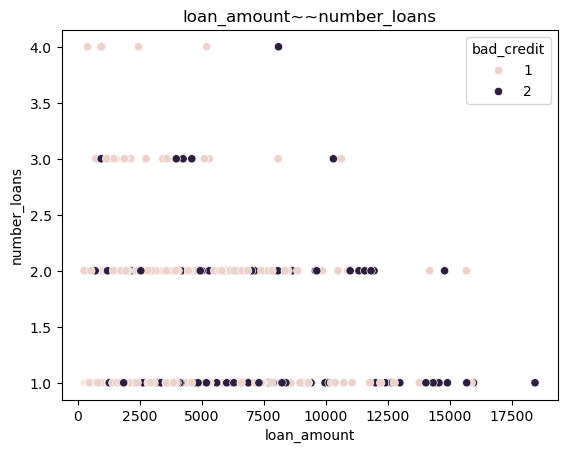

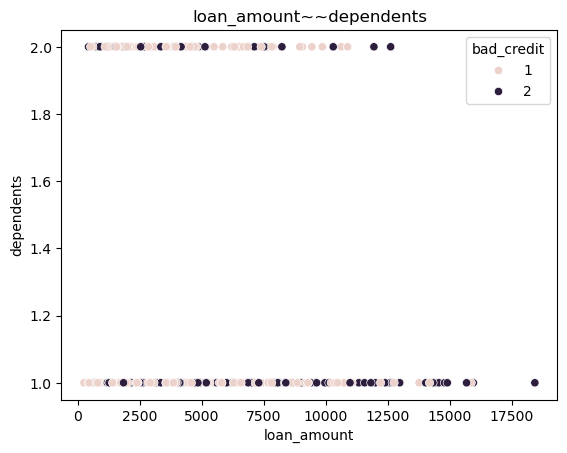

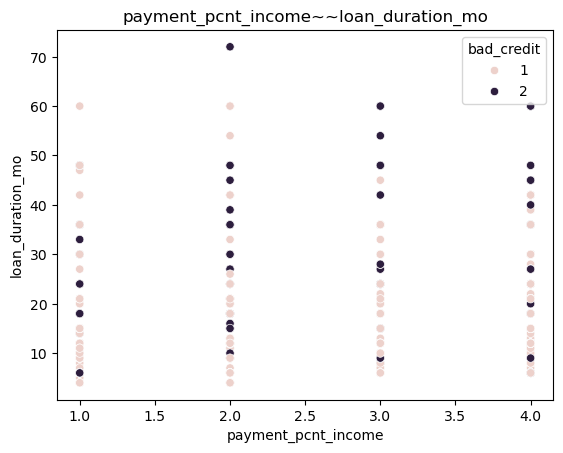

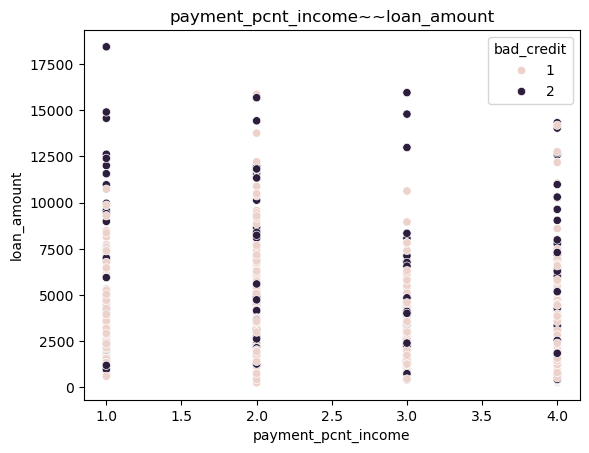

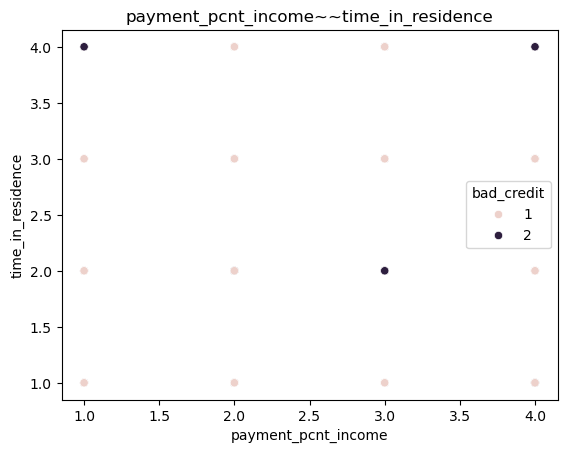

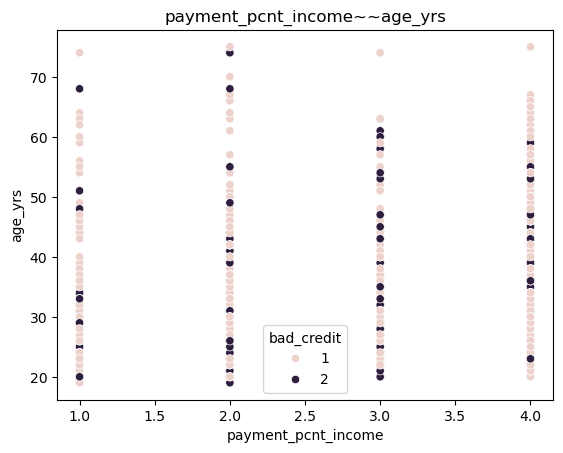

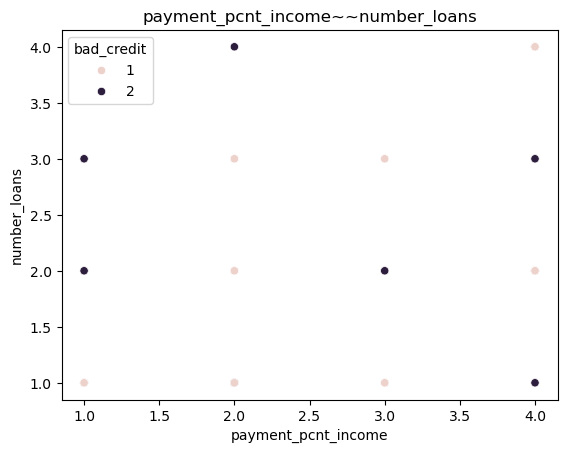

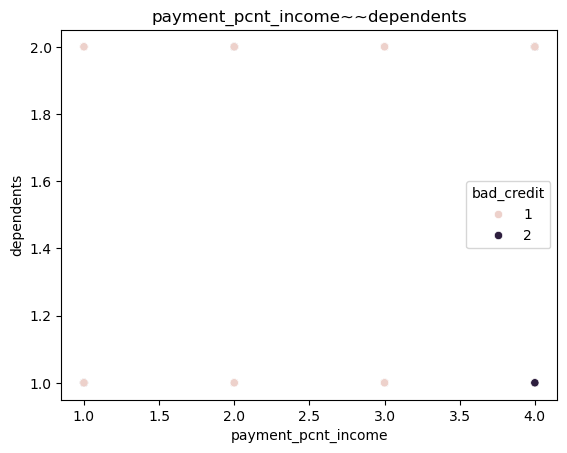

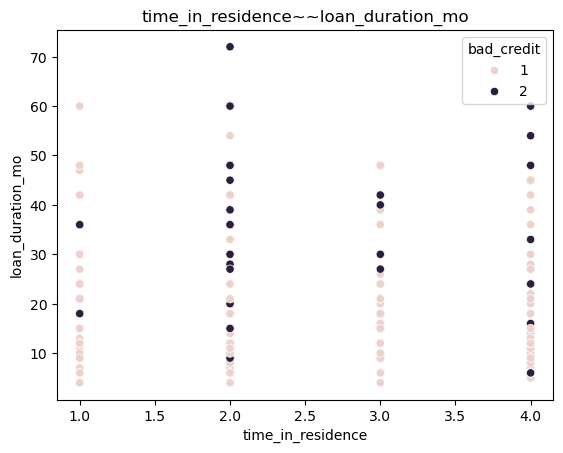

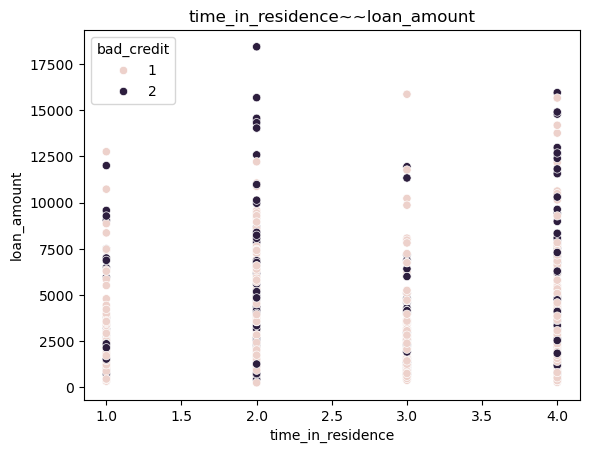

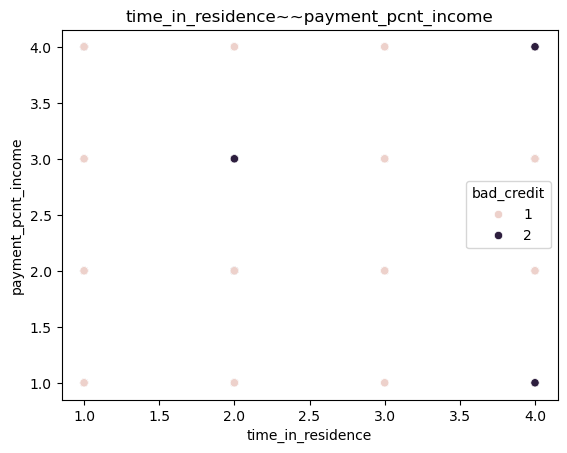

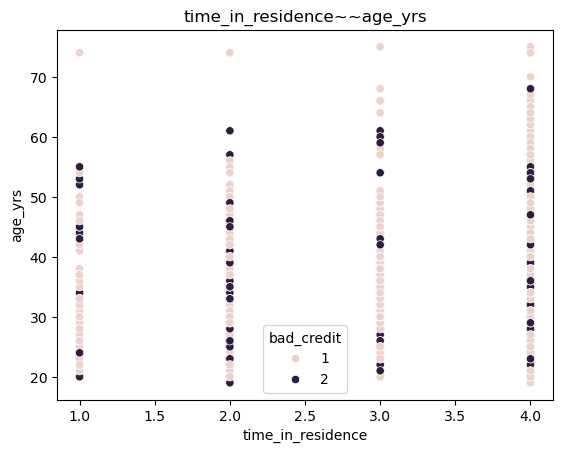

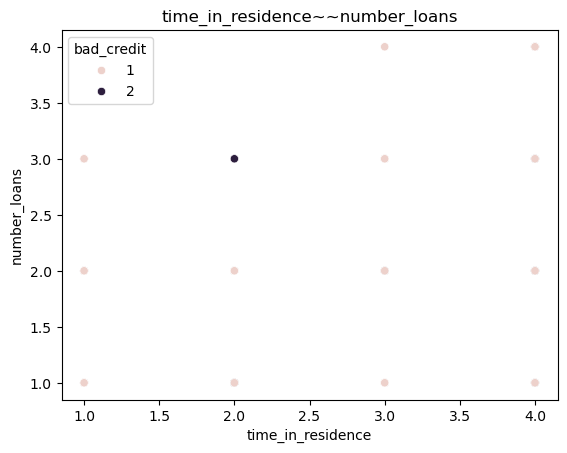

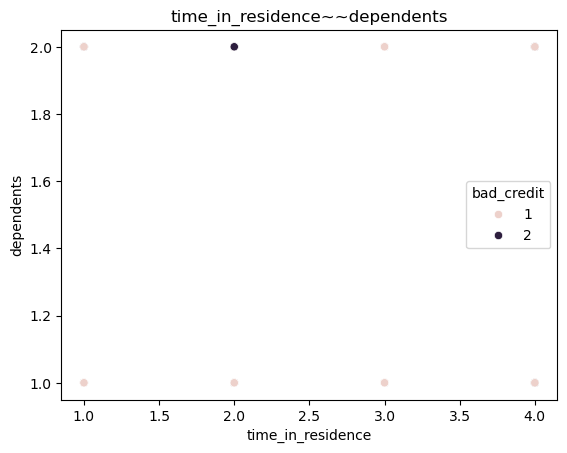

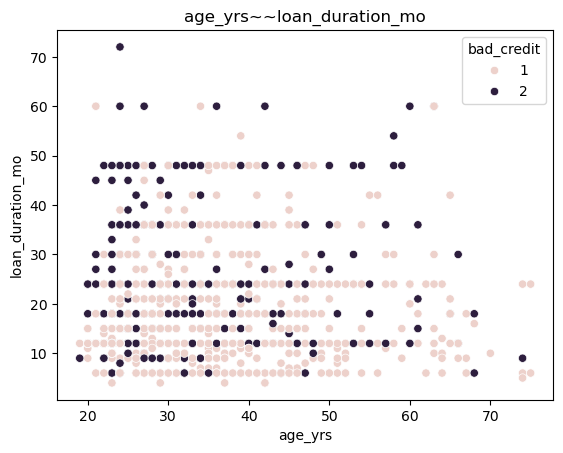

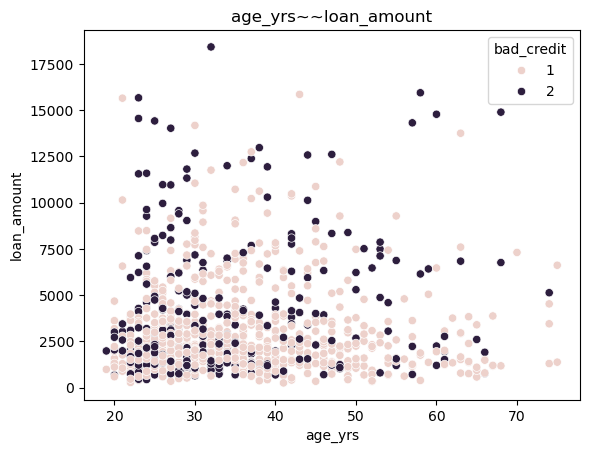

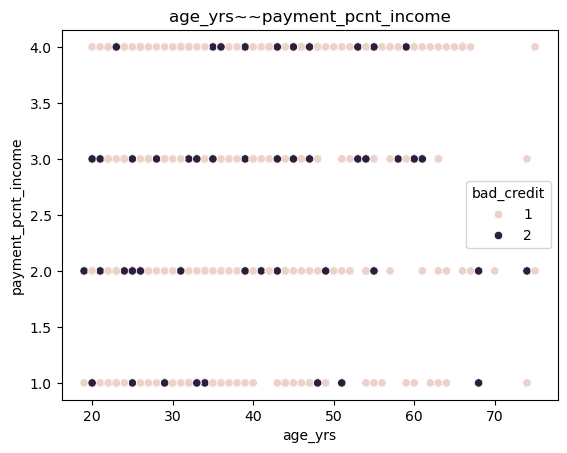

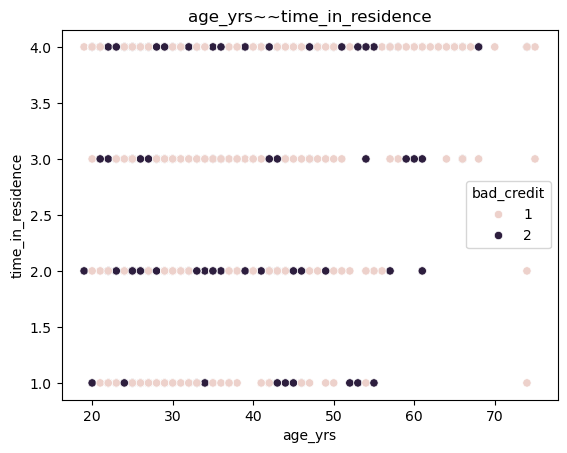

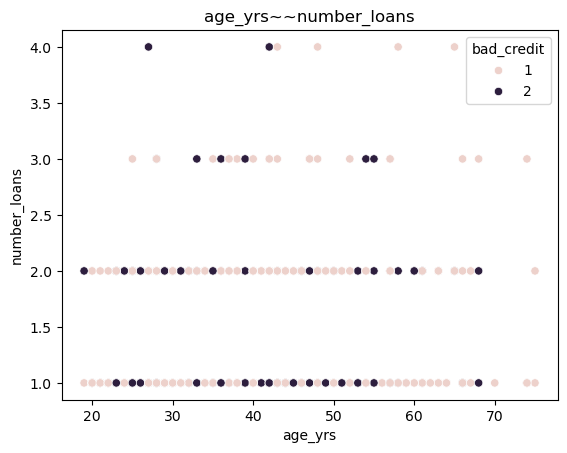

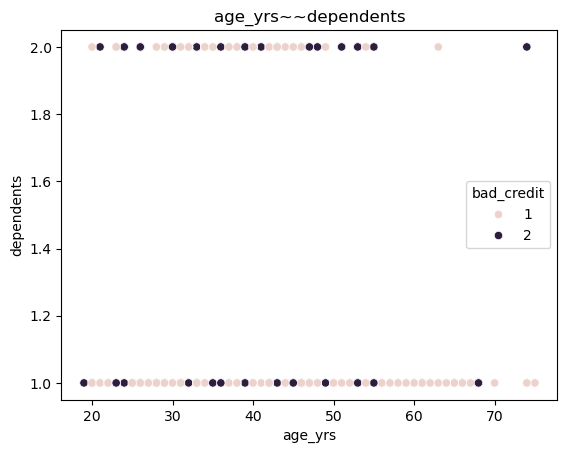

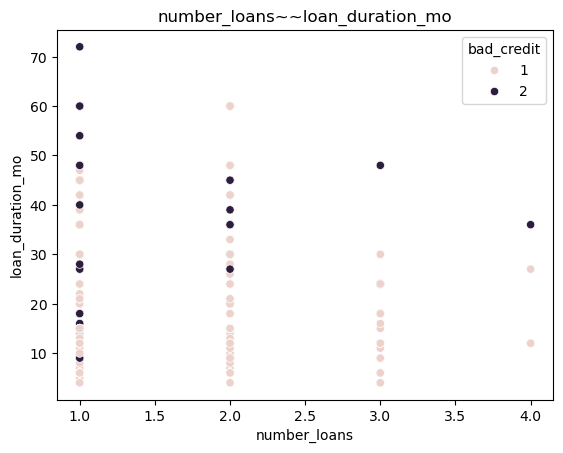

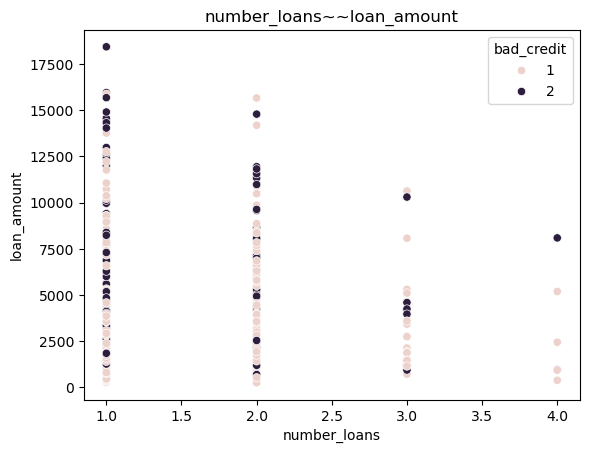

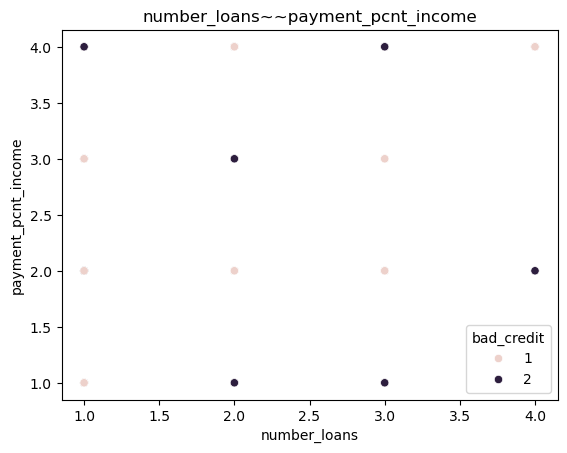

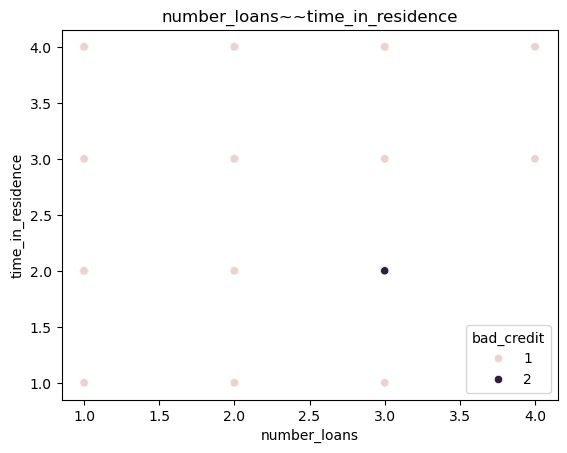

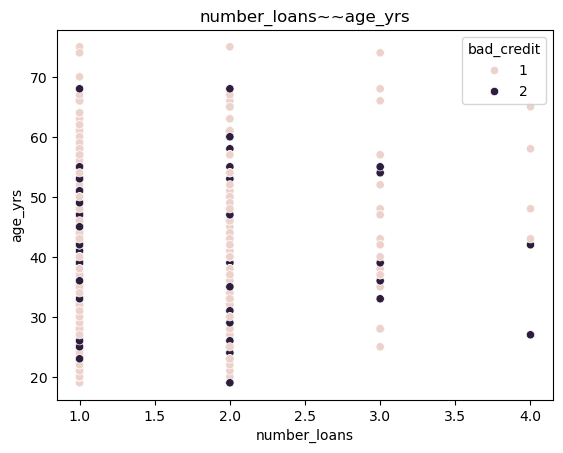

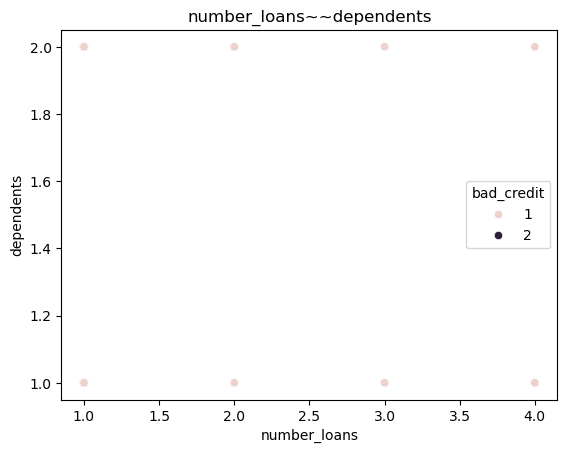

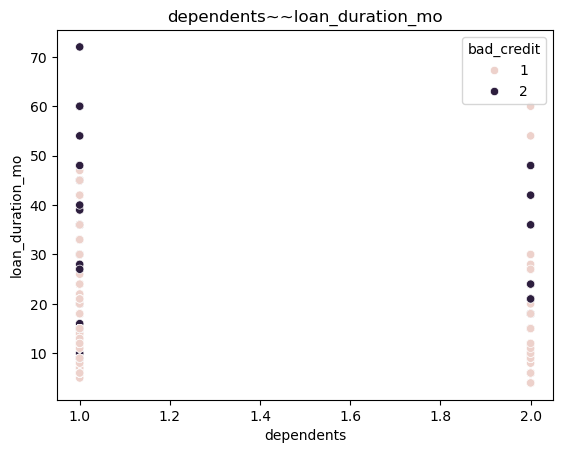

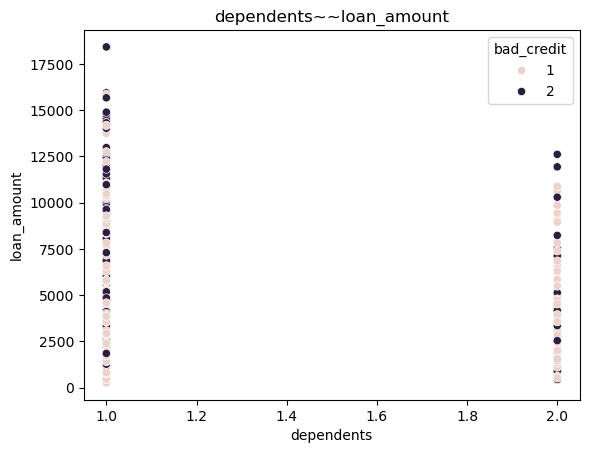

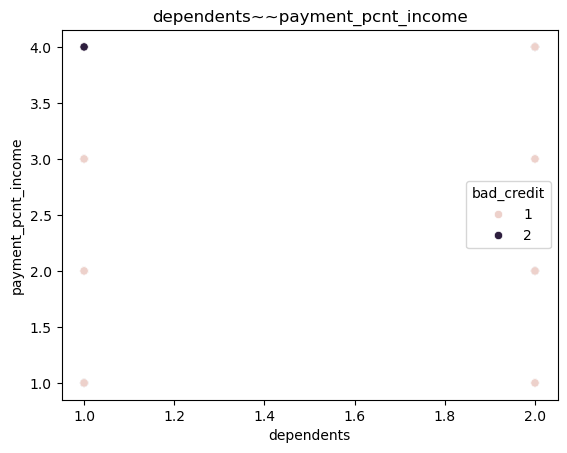

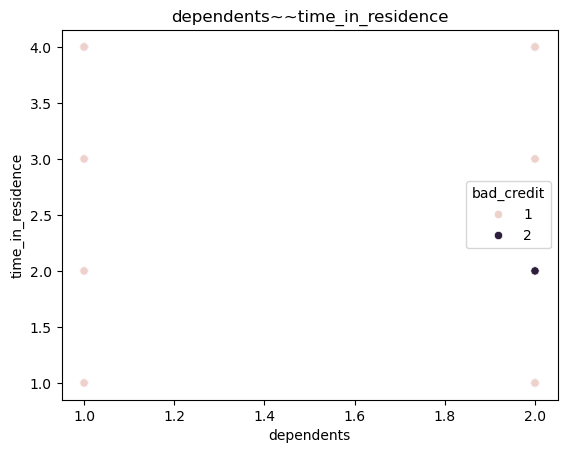

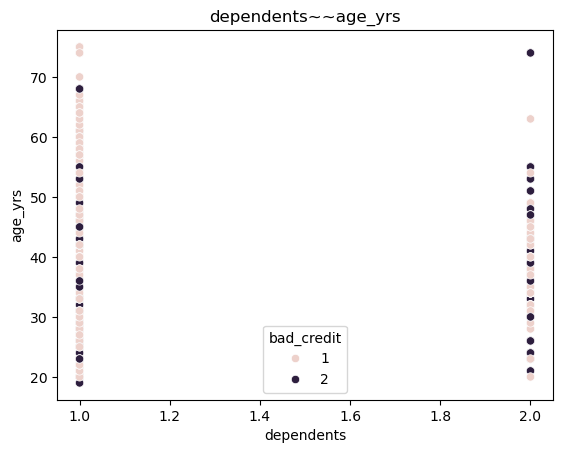

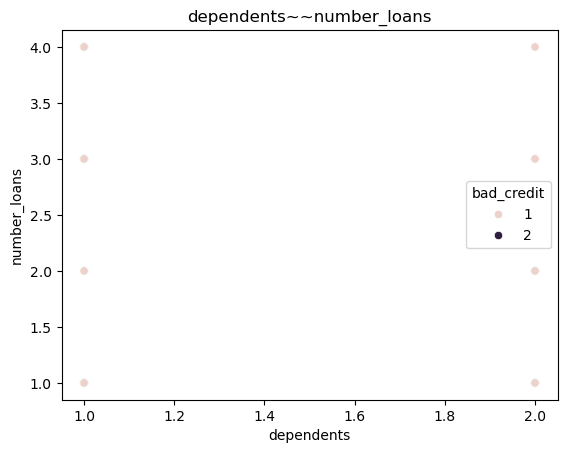

In [39]:
print('數值部分，以scatter顯示，加入分類')
import matplotlib.pyplot as plt
print(list3)
for i in list3:
  for j in list3:
    if i==j:
      continue
    if i=='customer_id' or j=='customer_id':
      continue
    if i=='bad_credit' or j=='bad_credit':
      continue
    sns.scatterplot(x=i,y=j,data=credit2,hue='bad_credit')
    plt.title(i+'~~'+j)
    plt.savefig('scatter2_'+i+'_'+j+'.png')
    plt.show()